In [31]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score

df = pd.read_csv('data.csv')
df.head()


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [33]:
# Data exploration
df.describe()



,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [34]:
df.corr( )

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
Socioeconomic Score,1.000000,0.002151,0.013618,-0.022793,0.335033
Study Hours,0.002151,1.000000,-0.187204,0.485408,0.810807
Sleep Hours,0.013618,-0.187204,1.000000,-0.105758,-0.124689
Attendance (%),-0.022793,0.485408,-0.105758,1.000000,0.321930
Grades,0.335033,0.810807,-0.124689,0.321930,1.000000


<Axes: >

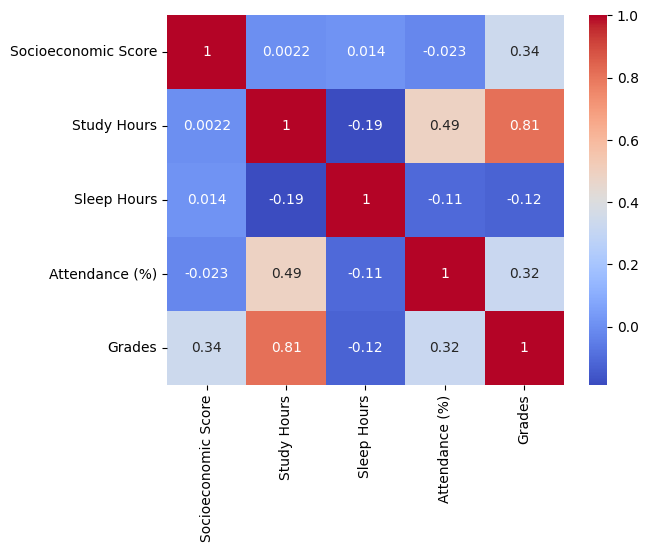

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

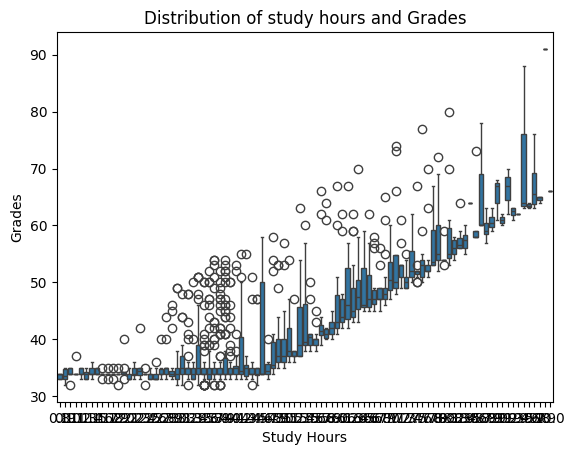

In [36]:
plt.title('variable correlation')
plt.Text(0.5, 1.0, 'variable correlation')
sns.boxplot(x='Study Hours', y='Grades', data=df)
plt.title('Distribution of study hours and Grades')
plt.show()

In [37]:
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [38]:
# Making the model
df.head()
X = df[['Study Hours','Attendance (%)','Socioeconomic Score','Sleep Hours']]
y = df['Grades']


In [39]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train


978     34.0
289     35.0
1158    34.0
802     34.0
1133    42.0
        ... 
1095    63.0
1130    33.0
1294    41.0
860     34.0
1126    33.0
Name: Grades, Length: 1110, dtype: float64

In [40]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Model predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse}")
print(f"R2 score:{r2}")


Mean Squared Error:1.4673514388489208
R2 score:0.9805597707892196
